# Machine Learning for Brain-Computer interfaces

Dr. Marius Keute

marius.keute@uni-tuebingen.de


In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets

%matplotlib inline

## Linear Regression

The goal of Linear Regression is to express the relationship between several variables by a linear model. Usually, we have one (metric) variable **y** containing data from **n units** (e.g., persons) on the left-hand side of the model, and we want to explain **y** by **p** (metric or categorical) **explanatory variables X**. Hence, **y** is an $n \times 1$ vector and **X** is an $n \times p$ matrix. In general, a linear equation,as you know, takes the form $y = ax+b$, $a$ being a multiplicative weight and $b$ being an additive intercept. For convenience, we can append the intercept term to the matrix **X** (by appending a first column full of ones) and appending the intercept term as a first element to the weight vector. Our model equation then becomes: $\mathbf{\hat{y}} =  \mathbf{X} \boldsymbol{{\hat{\beta}}}$, where $\boldsymbol{{\hat{\beta}}}$ is a $p \times 1$ vector of **regression weights**:




$\boldsymbol{\hat{y}} = $ $\begin{bmatrix} 
\hat{y_1} \\ \hat{y_2} \\ \vdots \\ \hat{y_n}
\end{bmatrix}$

$\boldsymbol{X} = \begin{bmatrix} 
1 & X_{1,1} & X_{1,2} & \dots & X_{1,p}\\
1 & X_{2,1} & X_{2,2} & \dots & X_{2,p}\\
1 & \vdots & \vdots & \ddots & \vdots\\
1 & X_{n,1} & X_{n,2} & \dots & X_{n,p}\\
\end{bmatrix}
$

$\hat{\boldsymbol{\beta}} = \begin{bmatrix} 
\hat{\beta_0} \\ \hat{\beta_1} \\ \vdots \\ \hat{\beta_p}
\end{bmatrix}
\quad
$

Note the **hat** over $\boldsymbol{\hat{y}}$ and $\boldsymbol{{\hat{\beta}}}$. It stands for **estimate** or **prediction**. It is there because $\boldsymbol{{\hat{\beta}}}$ is unknown, and the whole purpose of linear regression is to estimate it. **X** and **y**, on the other hand, are known, so why does **y** have a hat? It is important to understand that the equation $y = ax+b$ is usually not solvable for real-world data. That is to say, **y** cannot be perfectly reconstructed as a linear combination of the variables in **X**, so we will make a **prediction error**. The model equation above creates the best possible reconstruction of **y** as a linear combination of **X** - but it usually cannot create **y** itself from **X** (if this sounds too abstract - we will see an example very soon!).

We define the **prediction error** as $\epsilon := \mathbf{y} - \mathbf{\hat{y}}$, and we make the assumption that the error is normally distributed with mean zero and some unknown variance: $\epsilon \sim \mathcal{N}(0, \sigma^2)$. We also refer to these errors as **residuals**. So the full **model equation** becomes:


$\mathbf{y} = \mathbf{\hat{y}} + \boldsymbol{\epsilon} = \mathbf{X} \boldsymbol{{\hat{\beta}}} + \boldsymbol{\hat{\epsilon}}$

$$
\hat{\boldsymbol{\epsilon}} = \begin{bmatrix} 
\hat{\epsilon}_1 \\ \hat{\epsilon}_2 \\ \vdots \\ \hat{\epsilon}_n
\end{bmatrix}
$$

We will now load some data and get a visual understanding of this abstract notation.



In [3]:
#load example data set
data=datasets.load_diabetes(as_frame=True)['frame']

#print shape and first couple of lines of the dataset
print(data.shape)
data.head()



(442, 11)


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


### Your task
*Make the plotting code reusable - take the code in the cell below and turn it into a function, so that we cannot only plot s1 versus target, but any two variables in the dataset against each other.*

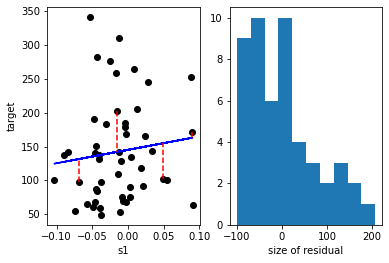

In [4]:
#For better visibility, we will only use the first 50 rows to plot.
x=data['s1'][:50]
y=data['target'][:50]

#don't worry about this code for now, you will soon understand what it does
coefs = np.polyfit(x,y,deg=1)
y_hat = coefs[1] + coefs[0]*x

#create scatterplot
fig,ax = plt.subplots(1,2)
ax[0].scatter(x,y,c='black')
ax[0].plot(x,y_hat,c='blue')
ax[0].set_xlabel('s1')
ax[0].set_ylabel('target')

#show residuals at four example points
pointix = [5, 15, 25, 35]
for ix in pointix:
    ax[0].plot([x[ix],x[ix]],[y[ix],y_hat[ix]],'--r')


ax[1].hist(y-y_hat)
ax[1].set_xlabel('size of residual')
plt.show()

## Estimating the regression weights

In the plot above, we have used the `np.polyfit` function to fit a linear model (**fitting** is, in this case, an other word for **estimating**). The resulting line is the best representation of y as a linear function of x. Remember that the intercept and slope of the line are controlled by $\hat{\boldsymbol{\beta}}$. But what does it mean to search for the *best* $\hat{\boldsymbol{\beta}}$? There are two possible perspectives, the least-squares and the maximum-likelihood perspective. In a Machine Learning context, we say that the model has an **objective function** or **loss function** (denoted $\mathcal{L}$) that we want to minimize.

### The Least Squares Perspective

We search for the $\hat{\boldsymbol{\beta}}$ that minimizes the sum of the squared residuals:

$\mathcal{L} = \frac{1}{n}||\boldsymbol{y} - \mathbf{X} \boldsymbol{\beta}||^2$

### The Maximum Likelihood Perspective

We search for the $\hat{\boldsymbol{\beta}}$ that maximizes the Gaussian likelihood of the residuals:

$f(x) \sim exp(-\frac{(x-\mu)^2}{2 \sigma^2})$, we use the negative log-likelihood as a loss function:
$\mathcal{L} \sim ||\boldsymbol{y} - \mathbf{X} \boldsymbol{\beta}||^2$

**It turns out that both approaches lead to the same result for linear regression!**

### Gradient of the loss function
The gradient of $\mathcal{L}$ is given by:

$\nabla{\mathcal{L}} = -\frac{2}{n} \boldsymbol{X}^T (\boldsymbol{y} - \mathbf{X} \boldsymbol{\beta}) \implies \hat{\boldsymbol{\beta}} = (X^TX)^{-1}X^Ty$

## Your task: 
Using this formula, complete the function below that estimates beta!

In [10]:
def beta_least_squares(X, y):
    '''Computes a least-squares estimate for beta in a linear regression model.
    
       Inputs:
         X: (n_observations, n_variables), numpy array with predictor values 
         y: (n_observations,) numpy array with target values
       Outputs:
         beta_hat: least-squares estimate of regression weights
         y_hat: The predictions of y based on X and beta_hat
         
 
    
    '''

    #add column of 1s to X to represent the intercept
    X = ...

    # calculate beta_hat using the formula above
    beta_hat = ...
    y_hat = X @ beta_hat #multiply X with beta_hat to get prediction
    return beta_hat, y_hat


In [4]:
beta_hat, y_hat = beta_least_squares(x, y, intercept=True)

#create scatterplot
fig,ax = plt.subplots(1,2)
ax[0].scatter(x,y,c='black')
ax[0].plot(x,y_hat,c='blue')
ax[0].set_xlabel('s1')
ax[0].set_ylabel('target')

#show residuals at four example points
pointix = [5, 15, 25, 35]
for ix in pointix:
    ax[0].plot([x[ix],x[ix]],[y[ix],y_hat[ix]],'--r')


ax[1].hist(y-y_hat)
ax[1].set_xlabel('size of residual')
plt.show()


NameError: name 'beta_least_squares' is not defined

## Statistics vs. Machine Learning

Until now, we estimated a model from data using our computer (machine). So we have arguably done ML. However, this model had an analytic solution, so it is a rather simple model to fit. Many ML models are more complex and do not have an analytic solution. In such cases, we often use **Gradient Descent** to find the minimum of the **loss function**. The idea behind gradient descent is simple: The gradient of the loss function is 0 at the minimum, so we have to increase our estimate of beta if the gradient is negative, and decrease the estimate if beta is positive. This will become clearer when we plot it.

Text(0, 0.5, 'loss')

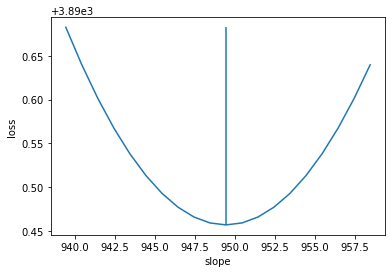

In [5]:
#Gradient descent - a simple example
x=data['bmi']
y=data['target']

#don't worry about this code for now, you will soon understand what it does
coefs = np.polyfit(x,y,deg=1)

#define a function that returns the loss (mean squared error) for given values of x, y, and beta
def loss_function(x,y,beta):
    y_hat = beta[1] + beta[0]*x
    return(np.mean((y - y_hat)**2))
#note that beta must be a vector containing the intercept and slope coefficient. 
# We will use the intercept from the true coefficients that we estimated above and just modify the slope. 
# We represent it graphically as a function of beta.

beta = coefs.copy() #store copy of true optimal values in new vector
slopes = np.arange(coefs[0]-10, coefs[0]+10) #create a range of slope (beta[1]) values to evaluate
losses = []
for slope in slopes:
    beta[0] = slope #replace true optimal slope parameter with current to-be-evaluated slope
    losses.append(loss_function(x,y,beta))
plt.figure()
plt.plot(slopes,losses)
plt.vlines(coefs[0], ymin=min(losses), ymax=max(losses))
plt.xlabel("slope")
plt.ylabel("loss")

## Cross Validation

ML and statistics have different approaches to **Generalization**. Generalization means that models do not only describe the data that they have seen during fitting, but also other data from the same population. While statistics tries to quantify the **uncertainty** of parameter estimation (by standard errors / significance tests), the common approach in ML is cross validation. It means that the model is fitted to one part of the data (training set), then its performance is evaluated on another part of the data. We might implement an example of cross-validation live in class if we have time. Otherwise, the Wikipedia article is recommendable if you would like to learn more.
https://en.wikipedia.org/wiki/Cross-validation_(statistics)
